In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
StudentPerformance = pd.read_csv("C:/Users/ABA/Desktop/nikamooz/mainCourseSTuuf/dataset/StudentsPerformance.csv", index_col=False)
first_5 = StudentPerformance.head()
StudentPerformance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
indexx                         1000 non-null int64
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [3]:
StudentPerformance.head(10)

,indexx,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,female,group B,bachelor's degree,standard,none,72,72,74
1,2,female,group C,some college,standard,completed,69,90,88
2,3,female,group B,master's degree,standard,none,90,95,93
3,4,male,group A,associate's degree,free/reduced,none,47,57,44
4,5,male,group C,some college,standard,none,76,78,75
5,6,female,group B,associate's degree,standard,none,71,83,78
6,7,female,group B,some college,standard,completed,88,95,92
7,8,male,group B,some college,free/reduced,none,40,43,39
8,9,male,group D,high school,free/reduced,completed,64,64,67
9,10,female,group B,high school,free/reduced,none,38,60,50


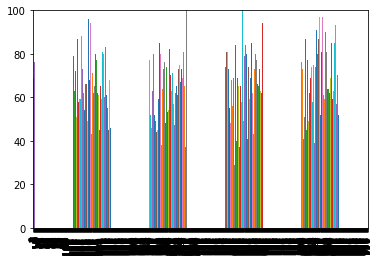

In [4]:
StudentPerformance['math score'].plot(kind='bar', ylim=(0,100))

## نمودار نامرتب است پس سورت میکنیم

In [4]:
sortedMath = StudentPerformance.sort_values('math score')
sortedMath.head()

,indexx,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,60,female,group C,some high school,free/reduced,none,0,17,10
980,981,female,group B,high school,free/reduced,none,8,24,23
17,18,female,group B,some high school,free/reduced,none,18,32,28
787,788,female,group B,some college,standard,none,19,38,32
145,146,female,group C,some college,free/reduced,none,22,39,33


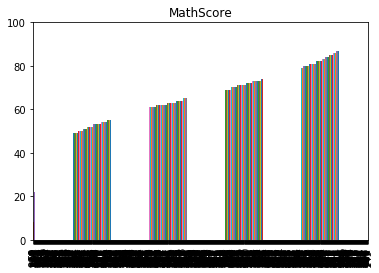

In [6]:
sortedMath['math score'].plot(kind='bar', title='MathScore', ylim=(0,100))

## در نمودار بالا دیتا پوینت ها زیاد هستند و نمیشود اطلاعات مناسبی بدست آورد

In [7]:
sortedMath['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

## SQL Distinct  = Pandas Unique 
##  مقادیر یکتا در ستون مورد نظر دیتا فریم ما

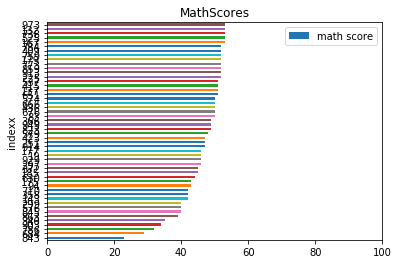

In [8]:
preparedMath = sortedMath[sortedMath['test preparation course'] == 'completed']

preparedMath.head(50).plot(x='indexx', y='math score', kind='barh', title='MathScores', xlim=(0,100))

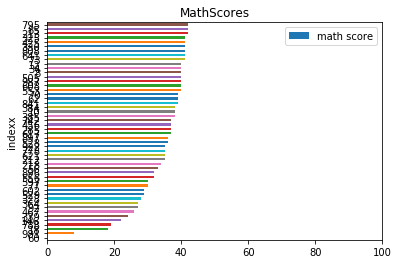

In [5]:
preparedMath = sortedMath[sortedMath['test preparation course'] == 'none']

preparedMath.head(50).plot(x='indexx', y='math score', kind='barh', title='MathScores', xlim=(0,100))

## محاسبه میانگین نمرات ریاضی برای دانش آموزانی که در آزمون آزمایشی شرکت کردند و خلاف آن

In [10]:
mean_mathScore = {}
nonePrepared = sortedMath[sortedMath['test preparation course'] == 'none']
completePrepared = sortedMath[sortedMath['test preparation course'] == 'completed']
none_mean = nonePrepared['math score'].mean()
prepared_mean = completePrepared['math score'].mean()
mean_mathScore[0,1] = (none_mean,prepared_mean)
mean_mathScore

{(0, 1): (64.0778816199377, 69.69553072625699)}


## تعداد ردیف ها در ازای مقادیر یکتای سری مورد نظر ما
## Series.value_counts()

In [11]:
StudentPerformance['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

#
#
#
#
# تمرین در منزل : موثر ترین فاکتورها روی نمره ریاضی چیست؟ 
#
#
#
#

## ساختن آبجکت گروپ بای

In [12]:
print(StudentPerformance.groupby('test preparation course'))

In [13]:
grouped = StudentPerformance.groupby('test preparation course')
grouped.get_group('completed')

,indexx,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,2,female,group C,some college,standard,completed,69,90,88
6,7,female,group B,some college,standard,completed,88,95,92
8,9,male,group D,high school,free/reduced,completed,64,64,67
13,14,male,group A,some college,standard,completed,78,72,70
18,19,male,group C,master's degree,free/reduced,completed,46,42,46
21,22,female,group B,some college,free/reduced,completed,65,75,70
24,25,male,group D,bachelor's degree,free/reduced,completed,74,71,80
35,36,male,group E,associate's degree,standard,completed,81,81,79
38,39,female,group D,associate's degree,free/reduced,completed,75,90,88
43,44,male,group B,some college,free/reduced,completed,59,65,66


## Aggregation

In [6]:
del StudentPerformance['indexx']
grouped = StudentPerformance.groupby('test preparation course').mean()
grouped.head()


,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


## در بالا مقادیر ستون شرکت در کلاس های متفرقه به عنوان ایندکس 




## گروپ بای در ازای کل دیتا فریم. فقط ستون های عددی لحاظ میشوند

In [15]:
StudentPerformance.groupby('test preparation course').agg(['min','max', 'mean'])

math score                 reading score       \
                               min  max       mean           min  max   
test preparation course                                                 
completed                       23  100  69.695531            37  100   
none                             0  100  64.077882            17  100   

                                   writing score                  
                              mean           min  max       mean  
test preparation course                                           
completed                73.893855            36  100  74.418994  
none                     66.534268            10  100  64.504673

## و یا برای ستون دلخواه

In [7]:
StudentPerformance.groupby('test preparation course')['math score'].agg(['mean'])

,mean
test preparation course,
completed,69.695531
none,64.077882


## تجمیع با تابع دلخواه

In [17]:
def dif(group):
    return(group.max() - group.mean())

In [18]:
StudentPerformance.groupby('test preparation course')['math score'].agg(dif)

test preparation course
completed    30.304469
none         35.922118
Name: math score, dtype: float64

## Pivot

In [19]:
StudentPerformance.pivot_table(['math score', 'reading score','writing score'], 'test preparation course')

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


## براساس هر سطر ستون دلخواه و با امکان جابجایی آنها

In [20]:
StudentPerformance.pivot_table('math score', 'test preparation course', aggfunc=['min','max', 'mean'], margins=True)

,min,max,mean
,math score,math score,math score
test preparation course,,,
completed,23,100,69.695531
none,0,100,64.077882
All,0,100,66.089000


In [24]:
def dif2(group):
    return(group.std())
StudentPerformance.groupby('test preparation course')['math score'].agg(dif2)


test preparation course
completed    14.444699
none         15.192376
Name: math score, dtype: float64

In [25]:
def dif3(group):
    return(group.var())
StudentPerformance.groupby('test preparation course')['math score'].agg(dif3)

test preparation course
completed    208.649336
none         230.808278
Name: math score, dtype: float64